In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv("PrePlacement.csv")

In [4]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_20384\2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

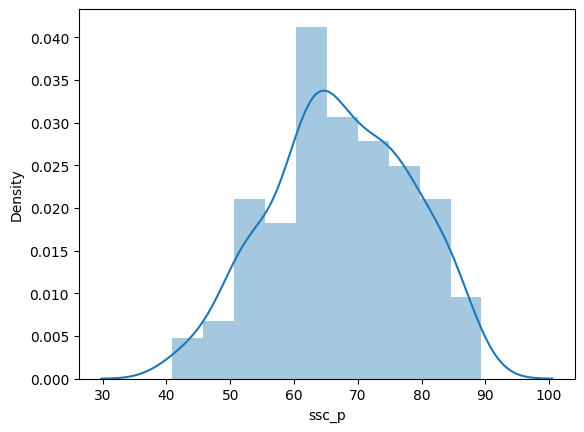

In [6]:
sns.distplot(dataset["ssc_p"])

In [7]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

C:\Users\user\AppData\Local\Temp\ipykernel_20384\2842244316.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=67.303, Standard Deviation=10.827
The area between range(60,80):0.6346413295441957


0.6346413295441957

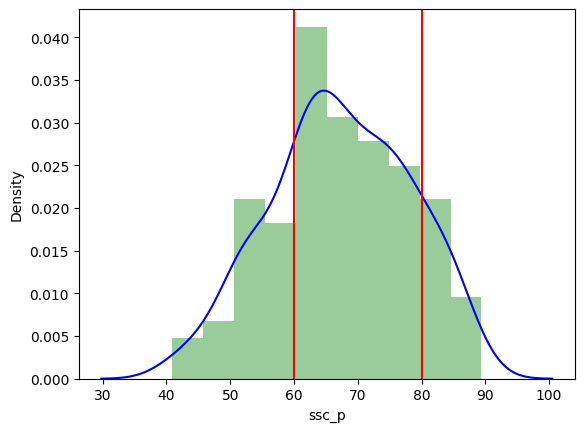

In [8]:
get_pdf_probability(dataset["ssc_p"],60,80)

In [9]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
    --------------------------------------- 0.2/9.9 MB 7.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/9.9 MB 6.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.9 MB 6.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.9 MB 5.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/9.9 MB 5.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.9 MB 4.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/9.9 MB 4.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 4.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.9 MB 3.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.3/9.9 MB 4.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.9 MB 4.0 MB/s eta 0:00:02
   ------------ --------------------------- 3.0/9.9 MB 4.2 MB/s eta 0:00:02
   ------------- --

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(78)

0.827906976744186

In [13]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


In [ ]:
stdNBgraph(dataset["hsc_p"])